# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Draw a dispersion diagram (scatter plot) for the data.

In [3]:
student_id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

In [4]:
student_data = pd.DataFrame({'StudentID': student_id, 'Age': age, 'Tardies': tardies})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

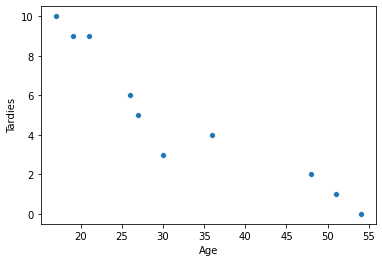

In [5]:
sns.scatterplot(x = student_data['Age'], y = student_data['Tardies'])

Quanto mais jovem, mais atrasos

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
student_data.corr()

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


In [7]:
student_data.cov()

,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
print(student_data['Age'].corr(student_data['Tardies']))
print(student_data['Age'].cov(student_data['Tardies']))

-0.9391626886887122
-45.56666666666666


Plot your regression model on your scatter plot.

slope: -0.242821, intercept: 12.888803, r_value = -0.939163


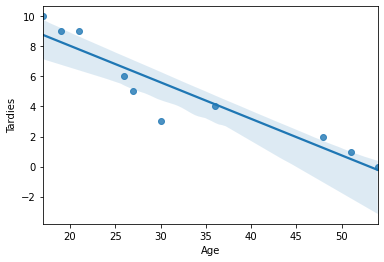

In [18]:
sns.regplot(x="Age", y="Tardies", data=student_data)
slope, intercept, r_value, p_value, std_err = stats.linregress(student_data['Age'], student_data['Tardies'])

print("slope: %f, intercept: %f, r_value = %f" % (slope, intercept, r_value))

In [40]:
x = student_data[['Age']]
y = student_data['Tardies']

model = sm.OLS(y,y)
results = model.fit()
predictions = results.predict(x)

In [41]:
predictions

0    17.0
1    51.0
2    27.0
3    21.0
4    36.0
5    48.0
6    19.0
7    26.0
8    54.0
9    30.0
dtype: float64

In [43]:
results.summary()

C:\Users\gisiq\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\gisiq\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1774: RuntimeWarning: divide by zero encountered in double_scalars
  return self.mse_model/self.mse_resid
C:\Users\gisiq\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\gisiq\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
C:\Users\gisiq\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Tardies   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                                inf
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                        0.00
Time:                        21:38:56   Log-Likelihood:                             inf
No. Observations:                  10   AIC:                                       -inf
Df Residuals:                       9   BIC:                                       -inf
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tardies        1.0000          0        inf      0.000       1.000       1.000
==============================================================================
Omnibus:                     2122.865   Durbin-Watson:                     nan
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.750
Skew:                           0.000   Prob(JB):                        0.153
Kurtosis:                       0.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [15]:
vehicles_data = pd.read_csv('vehicles.csv')
vehicles_data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [19]:
vehicles_emission = vehicles_data[['CO2 Emission Grams/Mile','Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
vehicles_emission.corr().sort_values(by='CO2 Emission Grams/Mile', ascending=False)

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185


slope: 0.037003, intercept: 0.021014, r_value = 0.986189


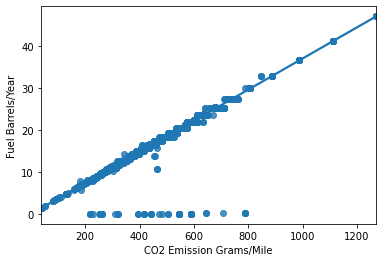

In [24]:
sns.regplot(x="CO2 Emission Grams/Mile", y="Fuel Barrels/Year", data=vehicles_data)
slope, intercept, r_value, p_value, std_err = stats.linregress(vehicles_data['CO2 Emission Grams/Mile'], vehicles_data['Fuel Barrels/Year'])

print("slope: %f, intercept: %f, r_value = %f" % (slope, intercept, r_value))

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
#import statsmodels.api as sm

In [21]:
X = vehicles_data[['CO2 Emission Grams/Mile','Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

Y = vehicles_emission['CO2 Emission Grams/Mile']

model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)
predictions[:5]

0    522.764706
1    683.615385
2    555.437500
3    683.615385
4    555.437500
dtype: float64

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          2.305e+30
Date:                     Wed, 17 Feb 2021   Prob (F-statistic):                        0.00
Time:                             20:41:47   Log-Likelihood:                      8.2668e+05
No. Observations:                    35952   AIC:                                 -1.653e+06
Df Residuals:                        35946   BIC:                                 -1.653e+06
Df Model:                                6                                                  
Covariance Type:                 nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
CO2 Emission Grams/Mile     1.0000   7.83e-15   1.28e+14      0.000       1.000       1.000
Year                     6.106e-16   1.35e-15      0.451      0.652   -2.04e-15    3.27e-15
Cylinders                -2.78e-13   1.21e-13     -2.307      0.021   -5.14e-13   -4.18e-14
Fuel Barrels/Year        5.995e-15   1.78e-13      0.034      0.973   -3.44e-13    3.56e-13
Combined MPG            -4.574e-14   6.87e-14     -0.666      0.505    -1.8e-13    8.89e-14
Fuel Cost/Year          -2.498e-16   7.57e-16     -0.330      0.741   -1.73e-15    1.23e-15
==============================================================================
Omnibus:                     3470.149   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5721.028
Skew:                          -0.702   Prob(JB):                         0.00
Kurtosis:                       4.360   Cond. No.                     3.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [27]:
party = pd.DataFrame({'Invited': [1, 3, 4, 6, 8, 9, 11, 14], 'Attended': [1, 2, 4, 4, 5, 7, 8, 13]})
party

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [28]:
print(party['Invited'].corr(party['Attended']))
print(party['Invited'].cov(party['Attended']))

0.9652303546573691
16.0


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

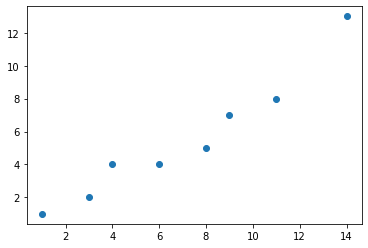

In [29]:
plt.scatter(x = party['Invited'], y = party['Attended'])

slope: 0.848485, intercept: -0.439394, r_value = 0.965230


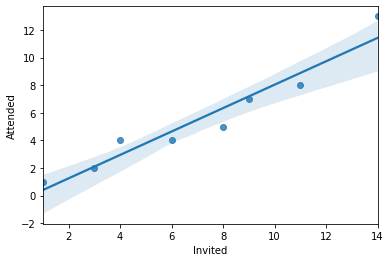

In [30]:
sns.regplot(x="Invited", y="Attended", data=party)
slope, intercept, r_value, p_value, std_err = stats.linregress(party['Invited'], party['Attended'])

print("slope: %f, intercept: %f, r_value = %f" % (slope, intercept, r_value))

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 